<a href="https://colab.research.google.com/github/JiwooKimm/CNUSW22_Project01_ImageClassifier/blob/master/01_Image_Classification/Problem_8_%EC%BB%A4%EC%8A%A4%ED%85%80_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EB%A5%98%ED%95%B4_%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <b>Problem 8. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.

--------

##### <b>Data Set: Rice leaf Image </b>
- https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases
- Data loaded by Kaggel API token 

##### <b> Classification target</b>

- Classify disease rice leaf

##### <b> Data Description</b>
- Composition 
  - The dataset has been divided into two groups, **train** and **validation**.
  - Inside the two folders are **4 categories of types**:
    - BrownSpot (418,105)
    - Healthy (1191, 297)
    - Hispa (452, 113)
    - LeafBlast (623, 156)
  - Image size: **not uniform**.



In [ ]:
# import shutil
# shutil.rmtree('/content/RiceLeafs')
# shutil.rmtree('/content/riceleaf')
# shutil.rmtree('/content/riceleafs')


##### **필요 라이브러리 로드 & 함수 정의** 




In [1]:
# 필요한 패키지 로드
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.metrics import accuracy_score

##### **캐글에서 데이터셋 불러오기 (Kaggle API token 이용)**




In [2]:
# 캐글에서 데이터셋 불러오기 (Kaggle API token 이용)
# !pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jearthkim","key":"b87aaeed64ad9ff4ce7c33a7e5947710"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d shayanriyaz/riceleafs

100% 14.9G/14.9G [01:49<00:00, 164MB/s]
100% 14.9G/14.9G [01:49<00:00, 146MB/s]


In [5]:
!ls

kaggle.json  riceleafs.zip  sample_data


In [6]:
!unzip riceleafs.zip

Streaming output truncated to the last 5000 lines.
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144628.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144733.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144738.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144742.jpg  
  inflating: RiceLeafs/train/Hispa/IMG_20190419_144810.jpg  
  inflating: RiceLeafs/train/Hispa

In [7]:
!rm riceleafs.zip

##### **데이터 확인 및 전처리**


레이블 확인 & 각 레이블 별 샘플의 수 확인 

In [8]:
import os
trn_path= os.listdir('RiceLeafs/train')
val_path= os.listdir('RiceLeafs/validation')

labels= list(trn_path)
print(labels)

train_count= pd.DataFrame(np.zeros(4),index= labels)
test_count= pd.DataFrame(np.zeros(4), index= labels)

for label in labels:
  print(label)
  train_count.loc[label] = len(os.listdir('RiceLeafs/train/%s'%label))
  test_count.loc[label] = len(os.listdir('RiceLeafs/validation/%s'%label))


['Hispa', 'BrownSpot', 'Healthy', 'LeafBlast']
Hispa
BrownSpot
Healthy
LeafBlast


In [9]:
print(train_count)
print(test_count)

                0
Hispa       452.0
BrownSpot   418.0
Healthy    1191.0
LeafBlast   623.0
               0
Hispa      113.0
BrownSpot  105.0
Healthy    297.0
LeafBlast  156.0


따로 이미지 파일 명 리스트가 있지 않으므로! 

각 디렉토리의 이미지 파일 로드하기 

In [10]:
from fastai.vision.all import *


Healthy= get_image_files(f'RiceLeafs/train/{trn_path[0]}')
Hispa=   get_image_files(f'RiceLeafs/train/{trn_path[1]}')
BrownSpot=     get_image_files(f'RiceLeafs/train/{trn_path[2]}')
LeafBlast= get_image_files(f'RiceLeafs/train/{trn_path[3]}')
print(Healthy[0])
print(Hispa[0])
print(BrownSpot[0])
print(LeafBlast[0])

RiceLeafs/train/Hispa/IMG_20190419_165641.jpg
RiceLeafs/train/BrownSpot/IMG_20190420_195256.jpg
RiceLeafs/train/Healthy/IMG_20190419_174534.jpg
RiceLeafs/train/LeafBlast/IMG_20190419_135942.jpg


In [ ]:
get_image_files(f'RiceLeafs/train/{trn_path[0]}')[0]

Path('RiceLeafs/train/Healthy/IMG_20190421_195346.jpg')

이미지 확인 

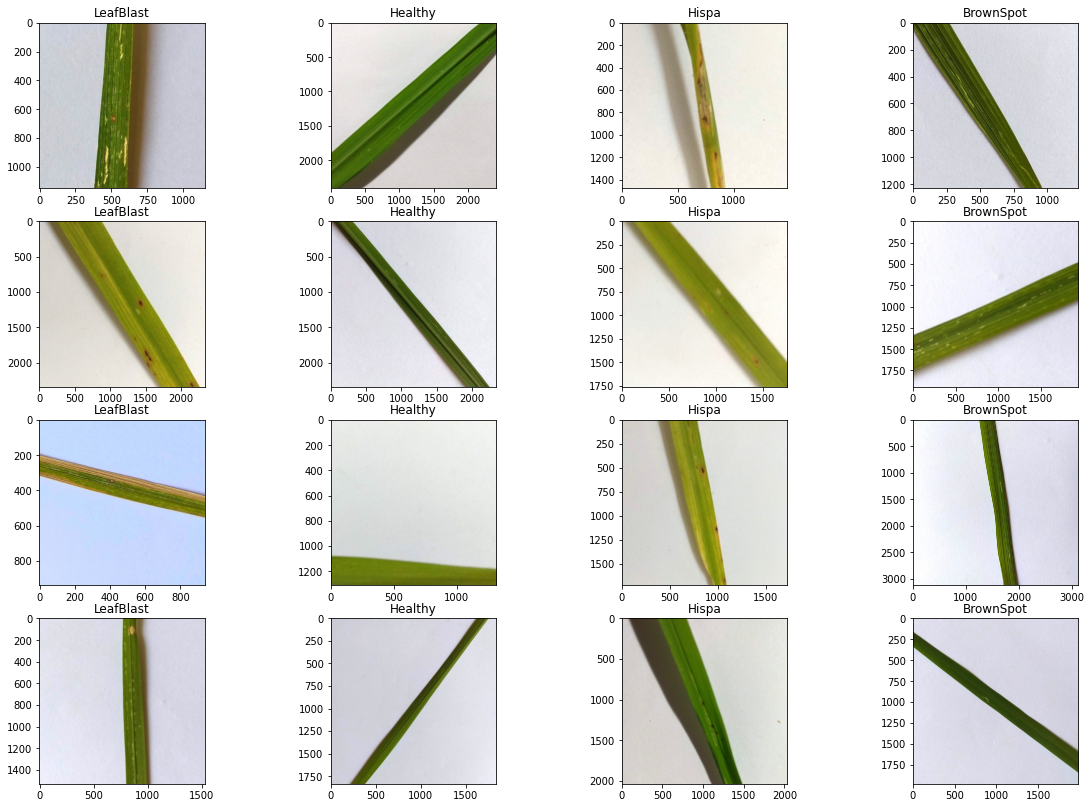

In [ ]:
fig = plt.figure(figsize=(20, 14))


for i in range(0, 4):
  ax = fig.add_subplot(4,4,i*4+1)
  img = PILImage.create(LeafBlast[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('LeafBlast')


  ax = fig.add_subplot(4,4,i*4+2)
  img = PILImage.create(Healthy[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('Healthy')

  ax = fig.add_subplot(4,4,i*4+3)
  img = PILImage.create(Hispa[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('Hispa')

  ax = fig.add_subplot(4,4,i*4+4)
  img = PILImage.create(BrownSpot[i])

  # print(img.shape)
  plt.imshow(img)
  ax.set_title('BrownSpot')


#### **Pre-processing for ML**
- Resizing the images for non-uniform -> uniform resolution (64*64*3) 
- Vectorization 
  - X train set size: (2684, 64\*64\*3)
  - X test set size: (671, 64\*64\*3)


In [ ]:
# print(sum(test_count[0]))
print(sum(train_count[0]))
train_count

2684.0


,0
Healthy,1191.0
BrownSpot,418.0
Hispa,452.0
LeafBlast,623.0


In [11]:
X_trn=[]
y_trn=[]
for label, count in train_count.iterrows():
  i=0
  while i < 200: # 4 solve RAM killed issue -->  down sampling 
    img_path= get_image_files(f'RiceLeafs/train/{label}')[i]
    img= np.asarray(Image.open(img_path))
    img_resize= np.resize(img, (32,32,3))
    
    X_trn.append(img_resize) 
    y_trn.append(label)
    
    i += 1


In [16]:

X_trn= np.array(X_trn)
y_trn= np.array(y_trn)

X_trn_rs= X_trn.reshape(len(y_trn), 32*32*3)

print(X_trn.shape)
print(y_trn.shape)

(800, 3072)
(800,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trn, y_trn, test_size = 0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 3072) (240, 3072) (560,) (240,)


In [ ]:
# X_tst=[]
# y_tst=[]
# for label, count in test_count.iterrows():
#   i=0
#   while i < count[0]:
#     img_path= get_image_files(f'RiceLeafs/validation/{label}')[i]
#     img= np.asarray(Image.open(img_path))
#     img_resize= np.resize(img, (64,64,3))
    
#     X_tst.append(img_resize) 
#     y_tst.append(label)
    
#     i += 1
# X_tst= np.array(X_tst)
# y_tst= np.array(y_tst)

# X_tst= X_tst.reshape(len(y_tst), 64*64*3)

# print(X_tst.shape)
# print(y_tst.shape)


### **Train**

In [31]:
# #### train and valid data in train folder
# dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
#     item_tfms=Resize(480, method='squish'),
#     batch_tfms=aug_transforms(size=128, min_scale=0.75))
# dls.show_batch(max_n=6)
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=18, verbose= True)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


소요된 시간(초 단위): 0.6026854515075684


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


In [32]:
y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.5071428571428571
검증 데이터셋 정확도: 0.48333333333333334
클래스: ['BrownSpot' 'Healthy' 'Hispa' 'LeafBlast']
반복 횟수: [18]
학습된 가중치 크기: (4, 3072)


In [43]:
def optimal_iter(maxIter,X_train,y_train,X_test,y_test):
  performance_test= pd.DataFrame(columns=['max_iter','Acc_test','run_time'])
  for iter in maxIter:
      start_time = time.time() # 시작 시간

      model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      val_acc = accuracy_score(y_test, y_pred)
      performance_test= performance_test.append({"max_iter": iter, 
                                                "Acc_test": val_acc,
                                                "run_time":time.time() - start_time}, ignore_index= True)
    
  bestP=performance_test[performance_test.Acc_test == max(performance_test.Acc_test)]
  print("results: \n")
  print(performance_test)
  print( '===========================================')
  print("The best hyperparameter :: ")
  print(bestP)

In [44]:
maxIter= range(5,100,5)
optimal_iter(maxIter,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


results: 

    max_iter  Acc_test  run_time
0        5.0  0.433333  0.193407
1       10.0  0.495833  0.268103
2       15.0  0.508333  0.334105
3       20.0  0.500000  0.435614
4       25.0  0.458333  0.623411
5       30.0  0.516667  0.556244
6       35.0  0.462500  0.604290
7       40.0  0.462500  0.683605
8       45.0  0.458333  0.747125
9       50.0  0.495833  0.829974
10      55.0  0.483333  0.973051
11      60.0  0.470833  1.014099
12      65.0  0.483333  1.099342
13      70.0  0.508333  1.292737
14      75.0  0.512500  1.197295
15      80.0  0.487500  1.458241
16      85.0  0.504167  2.358091
17      90.0  0.483333  1.888686
18      95.0  0.462500  2.396159
The best hyperparameter :: 
   max_iter  Acc_test  run_time
5      30.0  0.516667  0.556244


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### **For more performace** : Augmentation

-> 데이터 수가 너무 적었기 때문에 augmentation 해 준다. 

In [38]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((32, 32, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def flip(image, axis):
    image = image.reshape((32, 32, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=axis)
    return flipped_image.reshape([-1])


In [49]:
import random
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    rdaxis= random.randrange(0, 2)
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image,dx,dy))
    y_train_augmented.append(label)

    X_train_augmented.append(flip(image, axis= 0))
    y_train_augmented.append(label)

    X_train_augmented.append(flip(image, axis= 1))
    y_train_augmented.append(label)


    
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [50]:
print(X_train_augmented.shape, y_train_augmented.shape)

(2240, 3072) (2240,)


In [51]:
maxIter= range(5,100,5)
optimal_iter(maxIter, X_train_augmented, y_train_augmented, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


results: 

    max_iter  Acc_test  run_time
0        5.0  0.533333  0.667033
1       10.0  0.479167  1.026027
2       15.0  0.462500  1.304287
3       20.0  0.500000  1.635962
4       25.0  0.425000  1.901581
5       30.0  0.466667  2.218894
6       35.0  0.462500  2.272814
7       40.0  0.429167  2.484542
8       45.0  0.462500  2.823818
9       50.0  0.483333  3.213656
10      55.0  0.450000  3.390117
11      60.0  0.483333  3.534358
12      65.0  0.441667  4.755317
13      70.0  0.495833  3.989276
14      75.0  0.458333  4.237845
15      80.0  0.475000  4.449302
16      85.0  0.504167  4.787111
17      90.0  0.450000  4.909789
18      95.0  0.454167  5.411250
The best hyperparameter :: 
   max_iter  Acc_test  run_time
0       5.0  0.533333  0.667033


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [57]:
model_augmented = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=5)
model_augmented.fit(X_train_augmented, y_train_augmented)

y_pred_augmented = model_augmented.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred_augmented)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model_augmented.predict(X_test)
val_acc = accuracy_score(y_test, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.43794642857142857
검증 데이터셋 정확도: 0.5333333333333333
클래스: ['BrownSpot' 'Healthy' 'Hispa' 'LeafBlast']
반복 횟수: [30]
학습된 가중치 크기: (4, 3072)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### 성능평가

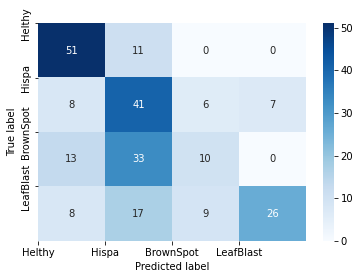

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.xticks(np.arange(0,4), ['Helthy','Hispa','BrownSpot','LeafBlast'])
plt.yticks(np.arange(0,4), ['Helthy','Hispa','BrownSpot','LeafBlast'])
plt.show()

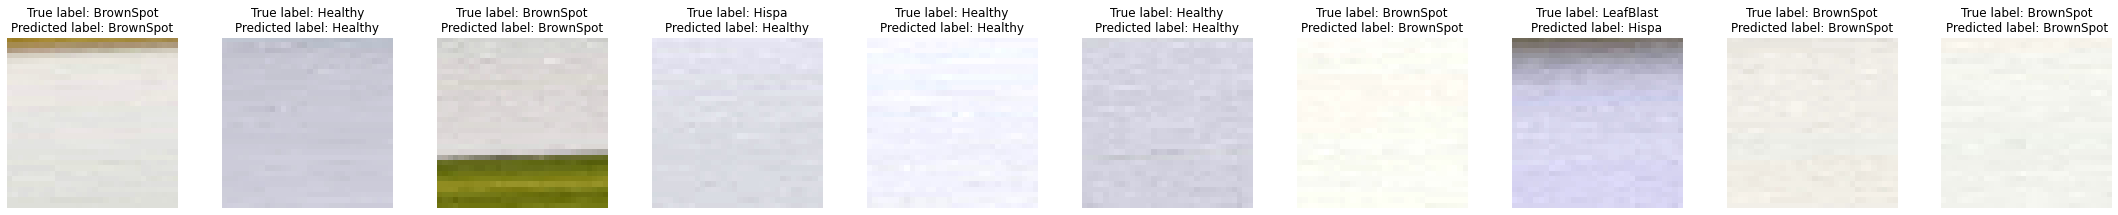

In [71]:
max_cnt = 10

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(30, 30)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_test[:max_cnt], y_test[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (32, 32, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')